### Group Members: Alexey Kalinin, Laura Gladson, Nonie Mathur

#### This is a continuation and completion of the Citibike homework project. We ran the z-test on the data and created a report on Authorea. 

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches


if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Research Question: Are users under 35 years of age significantly more likely to bike for longer durations than the average user? 

#### Alterative Hypothesis: Users under the age of 35 are significantly more likely to bike for longer durations

###### _$H_1$_ : U_35(ridelen) > U_avg(ridelen)

#### Null Hypothesis: Users under the age of 35 are likely to bike for the same or lesser durations than the average user 

###### _$H_0$_ : U_35(ridelen) <= U_avg(ridelen)

#### Significance Level: We will use a significance level of  alpha=0.05 which means that we want the probability of getting results at least as significant as ours to be less then 5%"

In [2]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  31.2M      0 --:--:-- --:--:-- --:--:-- 39.2M


In [3]:
get_ipython().system('unzip 201512-citibike-tripdata.zip')

Archive:  201512-citibike-tripdata.zip
  inflating: 201512-citibike-tripdata.csv  


In [5]:
datestring = '201512' 

In [7]:
 os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA")) # moving to PUIdata

256

In [8]:
df = pd.read_csv('201512-citibike-tripdata.csv')

In [9]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [10]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [11]:
df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [12]:
df.head()

,tripduration,birth year
0,475,1983.0
1,684,1975.0
2,1063,1966.0
3,1075,1985.0
4,293,1968.0


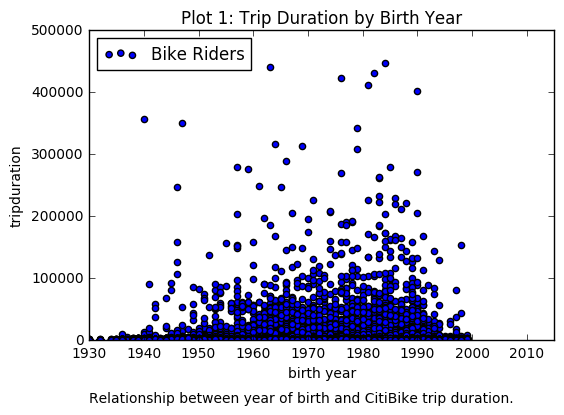

In [17]:
df.plot(x = 'birth year', y = 'tripduration', kind = 'scatter', label = 'Bike Riders')
plt.axis([1930, 2015, 0, 500000])
plt.title('Plot 1: Trip Duration by Birth Year')
plt.text(1930, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 10)
plt.legend(loc = 'upper left')

In [47]:
mean_pop = df.mean()
mean_pop

tripduration     945.711619
birth year      1976.278869
dtype: float64

In [48]:
std_pop = df.std()
std_pop

tripduration    9684.869098
birth year        11.832226
dtype: float64

In [41]:
df35 = df[df['birth year'] > 1980]

In [43]:
df35.head()

,tripduration,birth year
0,475,1983.0
3,1075,1985.0
7,1531,1988.0
8,1617,1986.0
10,721,1982.0


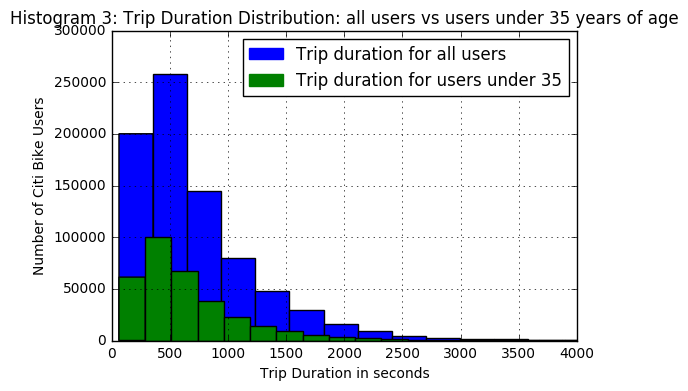

In [44]:
age_hist = df['tripduration'].hist(bins = 10000)
age_hist = df35['tripduration'].hist(bins = 10000)
plt.axis([0, 4000, 0, 300000])
age_hist.set_title("Trip Duration Distribution: all users vs users under 35 years of age")
age_hist.set_xlabel("Trip Duration in seconds")
age_hist.set_ylabel("Number of Citi Bike Users")
blue_patch = mpatches.Patch(color='blue', label='Trip duration for all users')
green_patch = mpatches.Patch(color='green', label='Trip duration for users under 35')
plt.legend(handles=[blue_patch, green_patch])

#### Above, we plotted the of trip duration of the entire Citibike population (in blue) and for the population under 35 (in green). Since the goal of our project is to compare the relationship between age and trip duration, specifically between users under 35 (sample) and the average Citi Bike user (population), we first have to calculate the mean and standard deviation and then we have to perform a statistical test of preference.  Per comments received from Federica, we will be performing the z-test.

#### Z Test 

In [49]:
mean_sample = df35.mean()
mean_sample

tripduration     753.569816
birth year      1986.786407
dtype: float64

In [51]:
std_sample = df35.std()
std_sample

tripduration    6957.030268
birth year         3.911396
dtype: float64

In [55]:
N_pop = len(df)
N_pop

804125

In [56]:
N_sample = len(df35)
N_sample

327267

In [59]:
Z_test = ((mean_pop) - df35.mean())/(std_pop/sqrt(N))

In [60]:
Z_test

tripduration     17.790571
birth year     -796.335834
dtype: float64

#### Analysis

#### From our Z-test, we obtained a Z-statistic of 17.79. From the Z-Table, this gave an area of over 0.9998. Thus, our p-value is (1 - 0.9998), or 0.0002, meaning there is a 0.02% probability that the difference observed between the two groups is due to chance alone. Specifically, this p-value is much smaller than our alpha level of 0.05, meaning we can reject our null hypothesis.

#### We can conclude that trip duration times of Citi Bike users are longer for those under age 35 compared the average user.